### Setup: 

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import seaborn as sns

# Import the visualization code
import visuals as vs

# Where to save the figures
PROJECT_ROOT_DIR = "."

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", 
                        fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

//anaconda/envs/dlndf/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
//anaconda/envs/dlndf/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [2]:
# Import libraries necessary for this project
from sklearn.model_selection import ShuffleSplit

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print ("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [3]:
### Using numpy wherever possible as requested by the question: 

# Minimum price of the data.  Can also do prices.min()
minimum_price = np.amin(prices)

# Maximum price of the data.  Can also do prices.max()
maximum_price = np.amax(prices)

# Mean price of the data.  Can also do prices.mean()
mean_price = np.mean(prices)

# Median price of the data.  Can also do prices.median()
median_price = np.median(prices)

# Standard deviation of prices of the data.  Can also do prices.std()
std_price = np.std(prices)

# Show the calculated statistics
print ("Statistics for Boston housing dataset:\n")
print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print ("Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


#### Checking the above using the describe function: 

In [4]:
np.round(prices.describe(),2)

count        489.00
mean      454342.94
std       165340.28
min       105000.00
25%       350700.00
50%       438900.00
75%       518700.00
max      1024800.00
Name: MEDV, dtype: float64

### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

#### Answer:   
**Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?**
- The more the average number of rooms, the higher the value of the houses in the neighbourhood. 
- In other words, an `increase` in the value of the `'RM'` feature will lead to an `increase` in the value of `'MEDV'`.
- And, a `decrease` in the value of the `'RM'` feature will lead to a `decrease` in the value of `'MEDV'`.  
- To put it another way, feature `'RM'` and `'MEDV'` are positively correlated. 


> - **Reason: **: The more the number of rooms, `'RM'`, the more the square foot area and hence, the more costly is the house. 

#### Showing postive correlation between `RM` and `MEDV`: 

Saving figure Median Value vs Average Number of Rooms per Neighbourhood


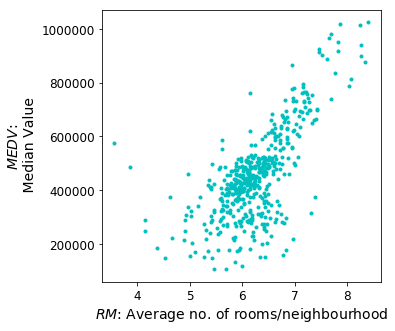

In [5]:
plt.figure(figsize = (5,5))
plt.plot(features["RM"], prices, "c.")
plt.xlabel("$RM$: Average no. of rooms/neighbourhood", 
           fontsize = 14)
plt.ylabel("$MEDV$:\n Median Value",
           fontsize = 14)
save_fig("Median Value vs Average Number of Rooms per Neighbourhood")

**Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?**
- The more the percentage of lower class workers, the lower the value of the house in the neighbourhood. 
- In other words, an `increase` in the value of the `'LSTAT'` feature will lead to a `decrease` in the value of `'MEDV'`. 
- And, a `decrease` in the value of the `'LSTAT'` feature will lead to an `increase` in the value of `'MEDV'`.  
- To put it another way, feature `'LSTAT'` and `'MEDV'` are negatively correlated. 

> - **Reason: **: This is because people with lower incomes will not be able to afford expensive homes. 

#### Showing negative correlation between `LSTAT ` and `MEDV`: 

Saving figure Median Value vs % of Lower Class Workers in Neighbourhood


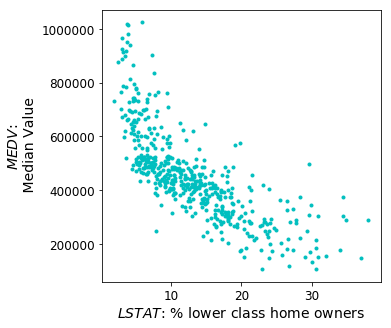

In [6]:
plt.figure(figsize = (5,5))
plt.plot(features["LSTAT"], prices, "c.")
plt.xlabel("$LSTAT$: % lower class home owners", 
           fontsize = 14)
plt.ylabel("$MEDV$:\n Median Value", fontsize = 14 )
save_fig("Median Value vs % of Lower Class Workers in Neighbourhood")

** Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?** 
- The more the ratio of students to teachers , the lower the value of the house in the neighbourhood. 
- In other words, an `increase` in the value of the `'PTRATIO'` feature will lead to a `decrease` in the value of `'MEDV'`. 
- And, a `decrease` in the value of the `'PTRATIO'` feature will lead to an `increase` in the value of `'MEDV'`.  
- To put it another way, feature `'PTRATIO'` and `'MEDV'` are negatively correlated.  
- _Although, the following plot does not show strong negative correlation, but negative correlation nonetheless_. 

> - **REASON**: This is because it is preferable that there be an ample number of teachers to teach all the students. As the number of teachers goes down, the `'PTRATIO`' increases. Therefore, as the `'PTRATIO'` increases, the vlaue of `'MEDV'` decreases. 

#### Showing weak negative correlation between `PTRATIO` and `MEDV`: 

Saving figure Median Value vs PTRATIO


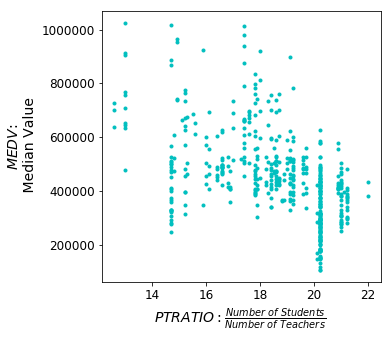

In [7]:
plt.figure(figsize = (5,5))
plt.plot(features["PTRATIO"], prices, "c.")
plt.xlabel(r"$PTRATIO:\
\frac{Number \ of \ Students}{Number \ of \ Teachers}$ ", 
           fontsize = 14)
plt.ylabel("$MEDV$:\n Median Value", fontsize = 14)
save_fig("Median Value vs PTRATIO")

#### Verifying intuition: 

In [8]:
corr_matrix = data.corr()
corr_matrix["MEDV"]

RM         0.697209
LSTAT     -0.760670
PTRATIO   -0.519034
MEDV       1.000000
Name: MEDV, dtype: float64

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [9]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [10]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print ("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

**Hint: **The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. 
* An R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

#### Answer:
- Our $R2$ score is $ 0.923$. 
- This means that $92.3\%$ of the variation in y (dependent variable, `MEDV`) is captured by x (independent variable or our _features_). 
- Therefore, the model has successfully captured the variation of the target variable. 
- Altough, an $R2$ score this close to a $100\%$ hints that the model might be overfitting to the data making it fit the quirks/noise in the training set. 

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [11]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    prices,
                                                    test_size = 0.20,
                                                    random_state = 42) 

# Success
print ("Training and testing split was successful.")

Training and testing split was successful.


In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((391, 3), (391,), (98, 3), (98,))

### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

#### Answer: 
- Simply put, the main benefit of splitting the dataset into training and testing subsets is that it helps in testing whether the trained model generalises well or just memorizes the training data.   

For instance, 

<img src="train_test_split.png"> 

- Here, the model on the right fits the training data perfectly. But when introduced to a new point, it does much worse than the model on the left.  

- Though the model on the left does not exactly fit the training data, it **generalizes well**.  

- The model on the right has memorised the points in the training data. This is known as overfitting. 

- Therefore, in order to _test_ whether our model _generalizes_ well or not, we need to split the data into `training` and `testing` data.  

- The golden rule here is, to never use the testing data for training. This of course, is synonymous to leaking the final exam papers to the students while they prepare for the final exam. 

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

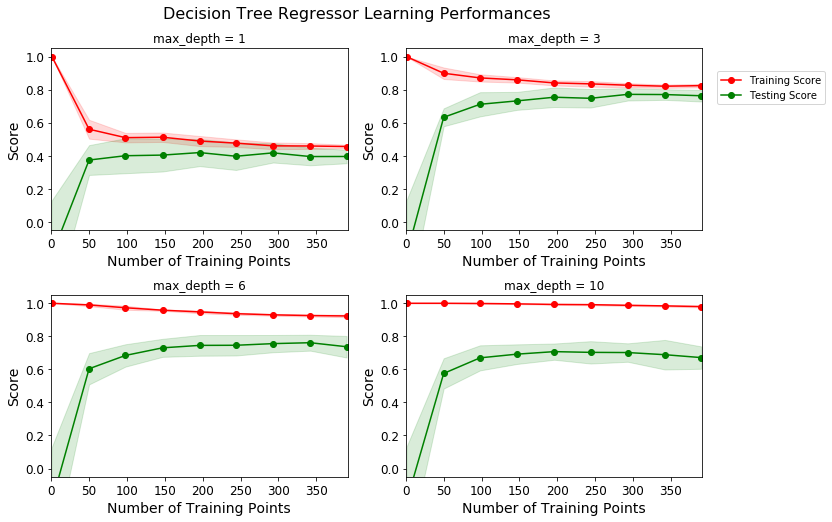

In [13]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

#### Answer:  

For learning purposes, I have evaluated 3 of the above 4 models.  

### The Under-fitting Model: 
__Choose one of the graphs above and state the maximum depth for the model.__ 
- The top left model , `'max_depth = 1'`.


__What happens to the score of the training curve as more training points are added ?__ 
- A model that under fits, the training error and testing error curves converge to a high error point(Low $R^2$ score).  - This is because as the number of training examples increases, the $R^2$ score on the training set decreases. On the other hand, the model knows more so the $R^2$ score on testing increases. This makes the curves converge at a low $R^2$ score which is okay as we don't expect a high bias/ underfitting model to get a high $R^2$ score on either the training or testing set. 


__Would having more training points benefit the model?__ 
- Adding more data points will not really benefit the model as we see that the testing score curve has almost plateaued. Add more data may make the model worse than it is right now. 

### The Good Model: 
__Choose one of the graphs above and state the maximum depth for the model.__ 
- The top right model , `'max_depth = 3'`.


__What happens to the score of the training curve as more training points are added ?__
- In a good model, we see that the training error and testing error curves converge to a low error point(High $R^2$ score).  - This is because as the number of training examples increases, the $R^2$ score on the training set decreases. On the other hand, the model knows more so the $R^2$ score on testing increases. This makes the curves converge at a higher $R^2$ score than when the `'max_depth'` was equal to 1 as this is a good model. 


__Would having more training points benefit the model?__
- Adding more data points will not really benefit the model as we see that the testing score curve has almost plateaued. 

### The Over-fitting Model :
__Choose one of the graphs above and state the maximum depth for the model.__ 
- The bottom right model , `'max_depth = 10'`.


__What happens to the score of the training curve as more training points are added ?__ 
- In a model that overfits, we see that the training error and testing error curves never converge.   
- This is because as the number of training examples increase, the $R^2$ score on the training set reaches a maximum point. On the other hand, the $R^2$ score on the testing error also reaches its maximum point but never comes close to the training score curve. This is because a model that overfits is able to wonders on the training set but fails to perform that well on the testing set. 


__Would having more training points benefit the model?__
- _Typically_, more data benefits high variance models but not in this case. Looking closely at the `testing` curve (when the number of data points is $>200$), we see that it has started to diverge from its optimal score. Therefore, it's evident that adding more data points is not necessary. 

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

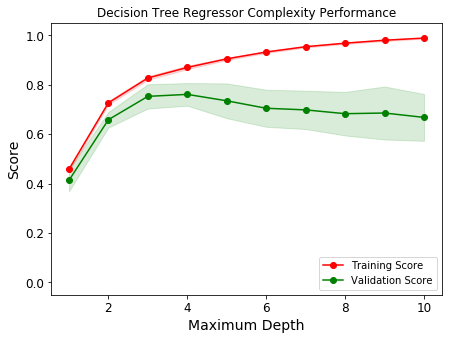

In [14]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

#### Answer: 

__When the model is trained with a maximum depth of 1, does the model suffer from high bias or high variance?__ 
- When the model is trained with a maximum depth of 1, it is not complex enough to pick up the nuances of the data. In other words, it is a high bias model.  
- A high bias model oversimplifies the problem and therefore is not able to do well in either the training or the validation set. This is shown by the __low $R^2$ scores__ of training and validation set (close to $0.4$ )
- In terms of `Decision Tree Regression`, there are not enough rules made yet that will help predict the price of the house in either the `training` or `validation` set. 

__How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify you conclusions?__
- When the model is trained with a maximum depth of 10, it memorizes the training data and is not able to do well on the validation data. In other words, it is a high variance model.  
- A high variance model over complicates the problem and therefore does great on the training data but fails to perform on the validation data. This is shown by __high $R^2$ score__ on the training set (close to $1.0$) and __low $R^2$ score__ of validation set (close to $0.7$ ).  
- In terms of `Decision Tree Regression`, now there are too many rules made that are specific to the `training` set but don't generalise well to the `validation` set. 

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

#### Answer: 

__Which maximum depth do you think results in a model that best generalizes the unseen data?__
- The maximum depth which results in a model that best generalizes to unseen data is at `Maximum Depth = 4`.  

__What intuition lead you to this answer?__
- To reach a conclusion regarding the best tradeoff between bias and variance, we need to look at the model complexity graph and ask these questions: 
    - _" At what point do we start overcomplicating the problem?"_ or 
    - _" At what point does the `training` score curve and `validation` score curve start to diverge?" _ or 
    - _" At what point do we stop learning and start to memorize the training data?"_  
- At that point, we see that we start to overfit to the model, which makes our $R^2$ score on training set go up, and $R^2$ score on the validation set to go down.  
- Notice, at `Maximum Depth = 4`, the training score is close to $0.9$, and the validation score is close to $0.8$. But, by the time we reach `Maximum Depth = 5`, we have started overfitting the model which is why the training score goes up, and the validation score goes down.  
- `Maximum Depth = 4` achieves the best training and validation scores along with achieving the best in bias-variance tradeoff. 

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

#### Answer: 
__What is the grid search technique? How it can be applied to optimize a learning algorithm ?__   

- From my understanding, a `hyper parameter` is a parameter of the learning algorithm, not of the model. It tunes and decides _how_ or _under what contraints_ does the learning algorithm learn. Eg: `C` for SVMs, `max_leaf_nodes` for Decision Trees, etc. 
- As the number of hyperparameters grows, it becomes extremely tedious/impossible to understand which combination of hyperparameter values will yield the best model. 
- Instead, we can use Grid Search method which makes a table with all the possible combinations of hyperparameter values and evaluates each using `cross-validation`. 
- This means, we take one combination of hyperparameter values. We train the model using the training data. And we test the model on the validation set to get a performance measure. We do this for each possible combination of hyperparameter values and pick the combination that yields the best performance.   


### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

#### Answer:  
**What is the k-fold cross-validation training technique?**   
- Usually, the data is split into 2 parts, the `training` set and the `testing` set. If we use the `testing` set to tweak the `hyperparameters` of the model, information from the `test` set can _bleed into_ the model. This can make our model perform well on the `testing` set, but not do _that well_ on newly seen data.  
- Solution? We can split the data into `Training`, __`Validation`__ and `Testing` sets. The `Validation` set is used to make the decisions regarding the `hyperparameters` and `complexity` of the model, which help in controlling the _bias-variance trade-off_. 
- An Analogy: 
    - i) _Studying For Exam_: Train your multiple models on the __`training` set(s)__.
    - ii) _Doing Sample Papers_: Select the model that performs best on the __`validation set`(s)__.    
    - iii) _Giving The Exam_: Run a single final test on the __`test` set__ to get an estimate of the generalization error.
- A small problem with the above approach is that setting aside a `validation set` reduces the number of samples which can be used for `training`. 
- In order to utilise all of the `training` data, we perform __`K-Fold Cross Validation`__. This approach splits the data into `k` buckets. Then, we train our model `k` times. Each time the model is trained, we use a different bucket for our `validation` set and the remaining data points as our `training` set.  Then, we average the results from all the `validation` sets to understand how our model is performing. 
- This gives us a good estimate as to how it would perform on the `testing` set for final model evaluation. 

** What benefit does this technique provide for grid search when optimizing a model? **   
- Again, there is the inherent benefit of not using all the `training` data. 
- If we used a single `validation` set to tune the model's `hyperparameters`, they are likely to favour/overfit the `validation` set we used. By rotating the data, we are able to assess the model's `hyperparameters` multiple times on different subsets of the data. 
- `K-Fold Cross Validation` allows us to not only get an estimate of the performance of the model, but also a measure of how precise the estimate is. This is done by evaluating the _standard deviation_ of the `cross-validation` scores on the `k` folds, for each `hyperparameter`-combination trained.  

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [15]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV


def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
#     cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
    cv_sets = ShuffleSplit(n_splits=10, test_size= 0.2 , train_size= None, random_state= 0)
    
    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state = 42)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {"max_depth" : list(range(1,11))}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric, greater_is_better=True)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator = regressor, 
                        param_grid = params, 
                        scoring = scoring_fnc,
                        cv = cv_sets,
                        verbose = 1)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [16]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print ("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Parameter 'max_depth' is 4 for the optimal model.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


** Hint: ** The answer comes from the output of the code snipped above.

#### Answer:  
The `max_depth` of the optimal model is $4$. This is exactly what was inferred in __Question 6__. 

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [17]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print ("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


#### Answer:  
** What price would you recommend each client sell his/her home at? **    
I would reccomend the prices predicted by the model:  

> Predicted selling price for Client 1's home: $\$403,025.00$  
>Predicted selling price for Client 2's home: $\$237,478.72$   
>Predicted selling price for Client 3's home: $\$931,636.36$   


** Do these prices seem reasonable given the values for the respective features? **:   

In [18]:
#### Getting descriptive statistics about the data: 
np.round(data.describe(),2)

,RM,LSTAT,PTRATIO,MEDV
count,489.00,489.00,489.00,489.00
mean,6.24,12.94,18.52,454342.94
std,0.64,7.08,2.11,165340.28
min,3.56,1.98,12.60,105000.00
25%,5.88,7.37,17.40,350700.00
50%,6.18,11.69,19.10,438900.00
75%,6.58,17.12,20.20,518700.00
max,8.40,37.97,22.00,1024800.00


The prices do seem reasonable. Here, I am given only $3$ features of the house. I have reasoned out each prediction depending on the correlation of the target variable with the features.  

Let's revise what the variables mean and how they are correlated with the target variable:  
- `'RM'` is the average number of rooms among homes in the neighbourhood. It is positively correlated with the target variable, `MEDV`. 
- `'LSTAT'` is the percentage of homeowners in the neighbourhood considered "lower class" (working poor). It is negatively correlated with the target variable, `MEDV`. 
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighbourhood. It is negatively correlated with the target variable, `MEDV`.   

__Client `1`:__  
- This client's house price is predicted a little below the mean of median house prices (`MEDV`). This makes sense: 
    - The number of rooms, $5$  is under the actual mean of the overall average number of rooms, $6$. Therefore, this lower's the price of the house than the mean. 
    - $17\%$ of the homeowners in the neighbourhood are considered "lower class". This is higher than the mean `LSTAT` variable, which is $13\%$. This too has a negative effect on the price of the house driving it under the mean. 
    - For every teacher, there are $15$ students in the neighbourhood. This is lower than the overall mean `PTRATIO`, $19$. This is why the price of the house is _not too low_ than the mean.   
    
__Client `2`:__  
- This client's house price is predicted between the overall minimum and first quartile of median house prices (`MEDV`). This makes sense: 
    - The number of rooms, $4$  is equal to the minimum overall average number of rooms, $4$. This results in the price of the house being close to the overall minimum price. 
    - $32\%$ of the homeowners in the neighbourhood are considered "lower class". This is between the overall maximum ($38\%$) and third quartile $(17\%)$ of `LSTAT` variable. This is the reason why the price of the house is in between the overall minimum and first quartile. 
    - For every teacher, there are $22$ students in the neighbourhood. This is equal to the overall maximum `PTRATIO`. This drives the price of the house down to the minimum price.   
    
__Client `3`:__  
- This client's house price is predicted between the overall third quartile and maximum of median house prices (`MEDV`). This makes sense: 
    - The number of rooms, $8$  is equal to the maximum overall average number of rooms, $8$. This results in the price of the house being close to the overall maximum price. 
    - $3\%$ of the homeowners in the neighbourhood are considered "lower class". This is in between the overall minimum ($2\%$) and first quartile $(7\%)$ of `LSTAT` variable. This is the reason why the price of the house is in between the overall maximum and third quartile. 
    - For every teacher, there are $12$ students in the neighbourhood. This is equal to the overall minimum `PTRATIO`. This drives the price of the house towards the maximum price. 

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [19]:
vs.PredictTrials(features, prices, fit_model, client_data)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


Trial 1: $391,183.33
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


Trial 2: $419,700.00
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


Trial 3: $415,800.00
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


Trial 4: $420,622.22
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


Trial 5: $418,377.27
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


Trial 6: $411,931.58
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


Trial 7: $399,663.16
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


Trial 8: $407,232.00
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


Trial 9: $351,577.61
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Trial 10: $413,700.00

Range in prices: $69,044.61


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

#### Answer:  
** How relevant today is data that was collected from 1978? How important is inflation?**  
- This data can be used to get an initial estimate. The dataset is not relevant for today's time as it is from the 70's. Even inflating it will not be satisfactory as it will make the data from _real_ to _realistic_. This means that it would not take into account other factors like population growth, shortages of houses, local economy, etc. A better option is to collect new data.  

**Are the features present in the data sufficient to describe a home? Do you think factors like quality of appliances in the home, square feet of the plot area, presence of pool or not etc should factor in?**  
- A good alternative to the Boston Housing dataset is the [Ames Housing](http://ww2.amstat.org/publications/jse/v19n3/decock.pdf) dataset collected from the houses in Ames, Iowa.  It includes $79$ explanatory variables describing the quality and quantity of many physical attributes of the house. The features present in the Boston Housing dataset are not sufficient to describe the homes. They can be used to get an estimate. Other features which can be included are:
    - Ordinal variables, which rate the condition and quality of heating/garages/fireplaces, etc. 
    - Other space-related variables for the square footage of ground floor, 1st floor, porches, basement, etc. 
    - Discrete variables quantifying the number of a certain item in the house, such as the number of bathrooms, rooms, pools, etc. Age is also an important factor to consider when buying the house. 
    - Other categorical variables which describe the neighbourhood, sale type, etc.    
    
**Is the model robust enough to make consistent predictions?**   
- The sensitivity test yielded a range of $69k$ which is quite large looking at the descriptive statistics of the target variable. This model is not robust enough to make constant predictions but can be used as a starting point.   

**Would data collected in an urban city like Boston be applicable in a rural city?**  
- The data is collected from houses in suburbs in Boston. A model trained on this data will not be able to make accurate prediction houses in rural cities. The houses in rural cities will have very low `RM` and a high `PTRATIO` and `LSTAT`.  
- Besides this, using this model for other urban cities in the world will probably give inaccurate results.   

**Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?**  
- I think it is fair to get an initial estimate. The houses in one neighborhood usually have similar characteristics, if not the same. To be more precise, we can collect data for individual houses. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.